In [14]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Enable inline plotting
%matplotlib inline

# Load the dataset
data = pd.read_csv('zoo3.csv')  # Update with your dataset path

# Preview the data
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,anta,1,0,0,1,0,0,0,1,1,1,0,0,4,0,0,0,1
1,ariranha,1,0,0,1,0,1,1,1,1,1,0,1,4,1,0,0,1
2,boto-cor-de-rosa,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,0,1
3,bugio,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1
4,cachorro-vinagre,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [15]:
# Check for missing values
print(data.isnull().sum())

# Check data types and summary
print(data.info())
print(data.describe())

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  70 non-null     object
 1   hair         70 non-null     int64 
 2   feathers     70 non-null     int64 
 3   eggs         70 non-null     int64 
 4   milk         70 non-null     int64 
 5   airborne     70 non-null     int64 
 6   aquatic      70 non-null     int64 
 7   predator     70 non-null     int64 
 8   toothed      70 non-null     int64 
 9   backbone     70 non-null     int64 
 10  breathes     70 non-null     int64 
 11  venomous     70 non-null     int64 
 12 

In [16]:
# Define features (X) and target (y)
X = data.drop(columns=['animal_name', 'class_type'])  # Drop non-informative column
y = data['class_type']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.9285714285714286
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         0
           7       1.00      1.00      1.00         1

    accuracy                           0.93        14
   macro avg       0.67      0.67      0.67        14
weighted avg       0.93      0.93      0.93        14



C:\Users\Leo\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Leo\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Leo\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result

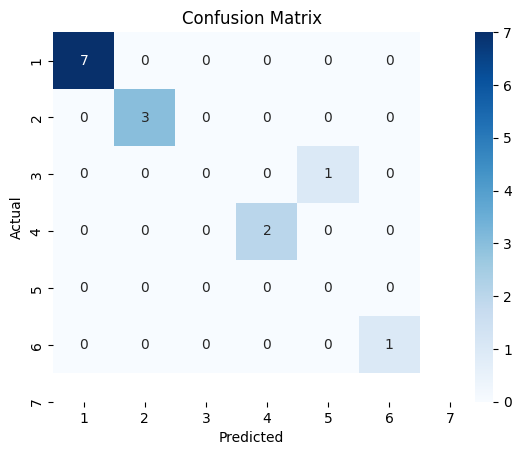

In [17]:
# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

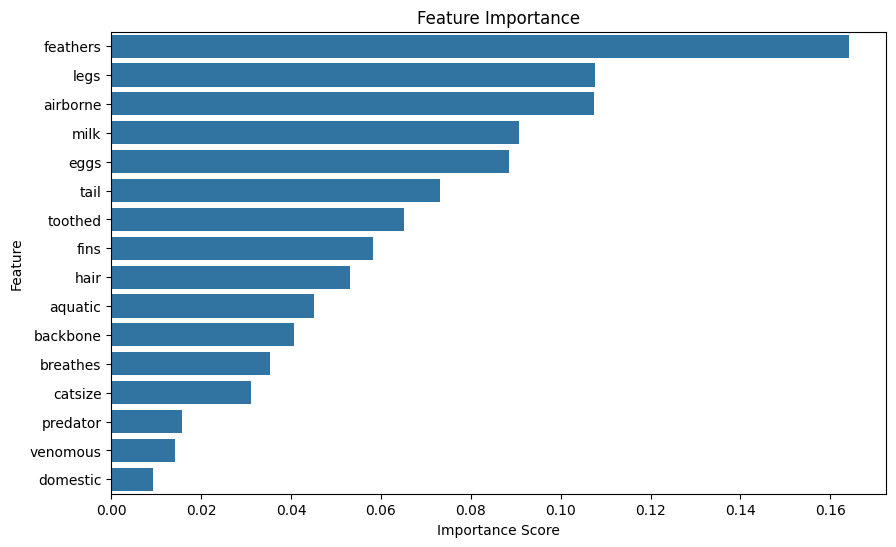

In [18]:
# Calculate feature importance
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

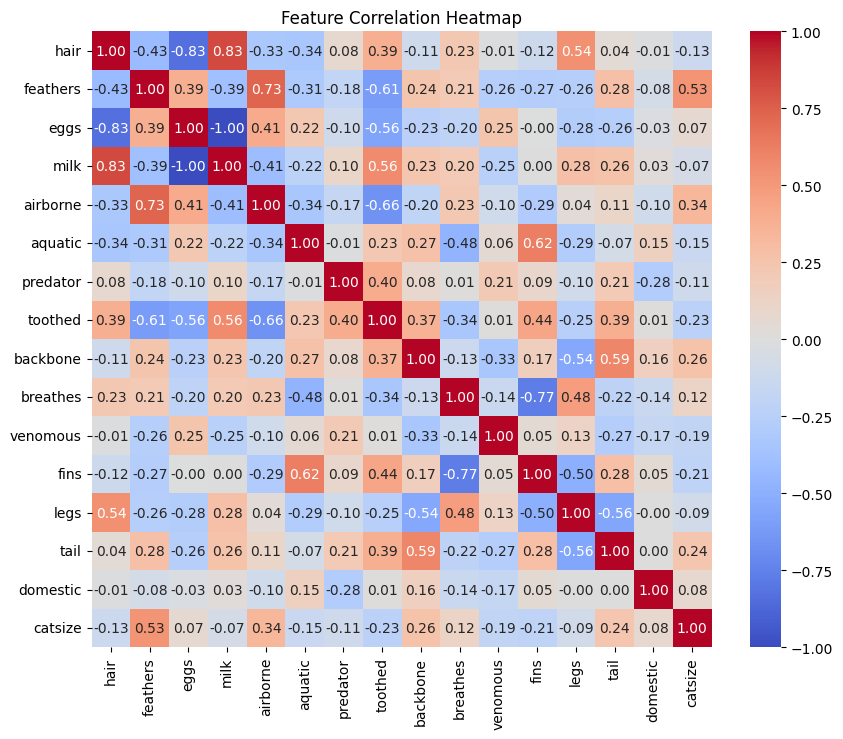

In [19]:
data_numeric = data.drop(columns=['animal_name','class_type'])

correlation_matrix = data_numeric.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

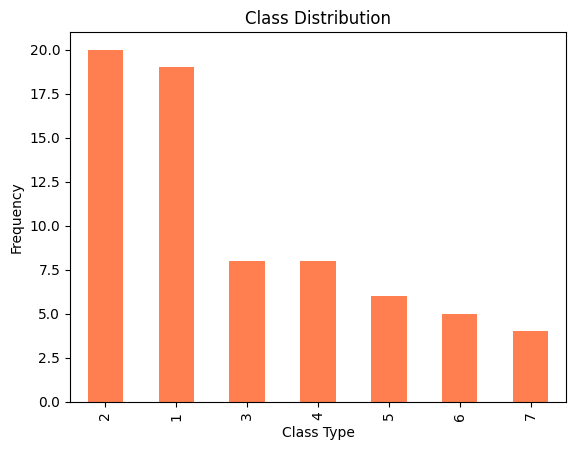

In [20]:
# Bar plot for class distribution
data['class_type'].value_counts().plot(kind='bar', color='coral')
plt.title("Class Distribution")
plt.xlabel("Class Type")
plt.ylabel("Frequency")
plt.show()


In [22]:
platypus= [[1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 4, 1, 0, 0]]
predicted_class = clf.predict(platypus)

print("Predicted class for Platypus:", predicted_class[0])

Predicted class for Platypus: 1


C:\Users\Leo\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
